<a href="https://colab.research.google.com/github/WinuWijegunawardhana98/Integrated-Healthcare-Management-System-for-Vulnerable-Populations/blob/Sandaruwan/Predicting_Heart_Disease_using_Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Heart Disease using Artificial Neural Network

We are going to take the following approach

1.   Problem defination
2.   Data
3.   Evaluation
4.   Features
5.   Modelling
6.   Experimentation








Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import Data Set

In [3]:
# Read the dataset from the CSV file
df = pd.read_csv('/content/heartdataset.csv')

Data Preprocessing and Analysing

In [4]:
# Check for any missing (null) values in the dataset
df.isnull().sum()
# Display the entire dataset
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [5]:
# number of rows and columns in the dataset
df.shape

(1025, 14)

In [6]:
# Get the count of each unique value in the target column
# This helps in understanding the distribution of the target variable
df.target.value_counts()


,count
target,
1,526
0,499


<Axes: xlabel='target'>

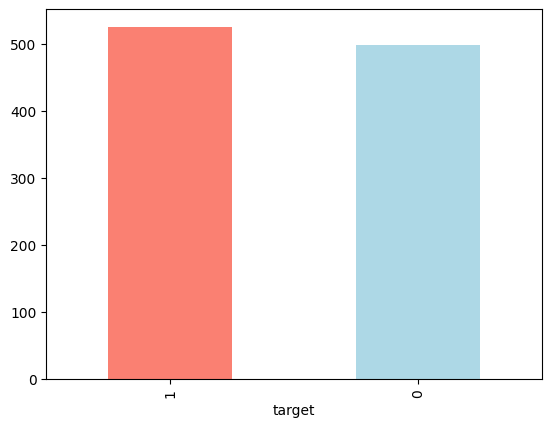

In [7]:
# lets visualize the target variable
df.target.value_counts().plot(kind="bar",color=["salmon","lightblue"])

In [8]:
# getting some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [9]:
# Check for missing (null) values in each column of the DataFrame
# This will return the count of missing values in each column
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
# Generate summary statistics for the numeric columns of the DataFrame
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Heart disease frequency acc to sex

In [11]:
# Count the occurrences of each unique value in the 'sex' column
df.sex.value_counts()


,count
sex,
1,713
0,312


In [13]:
# Compare target column to sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,86,413
1,226,300


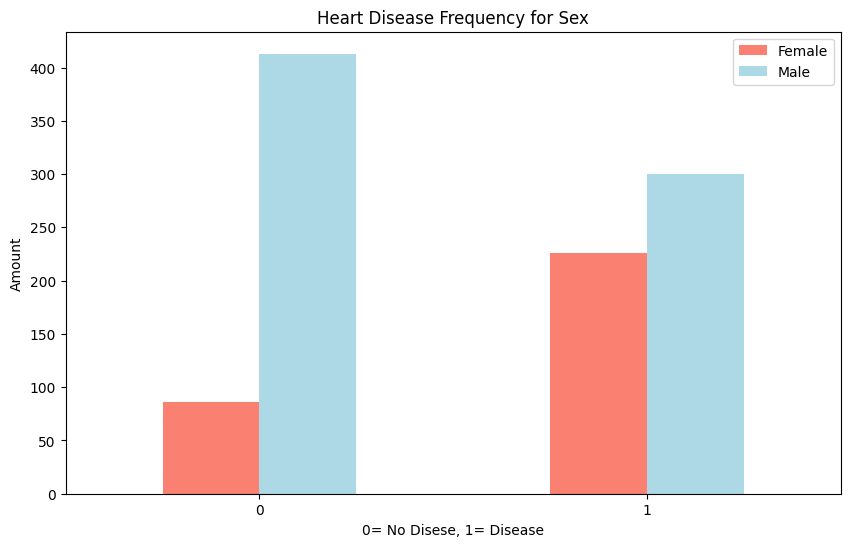

In [14]:
# lest visualize more
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color = ["salmon","lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0= No Disese, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])

plt.xticks(rotation=0);

In [15]:
# Age vs max heart rate
df.thalach.value_counts()

,count
thalach,
162,35
160,31
163,29
173,28
152,28
...,...
194,3
185,3
106,3


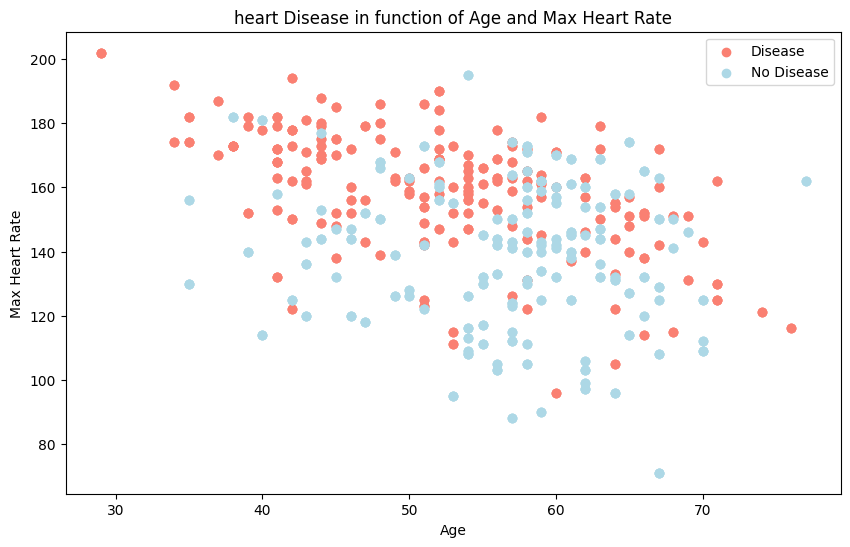

In [16]:
# Craete another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c ="salmon")

#Sca tter with negative examples
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c = "lightblue")

# Add some helpful info
plt.title("heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

<Axes: ylabel='Frequency'>

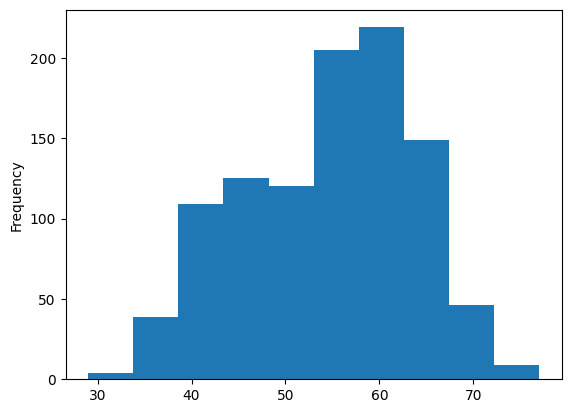

In [17]:
# Checking the age distribution
df.age.plot.hist()


Heart Diease Frequency per chest pain Type

In [18]:
# Create a cross-tabulation of the 'cp' (chest pain type) and 'target' (heart disease)
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


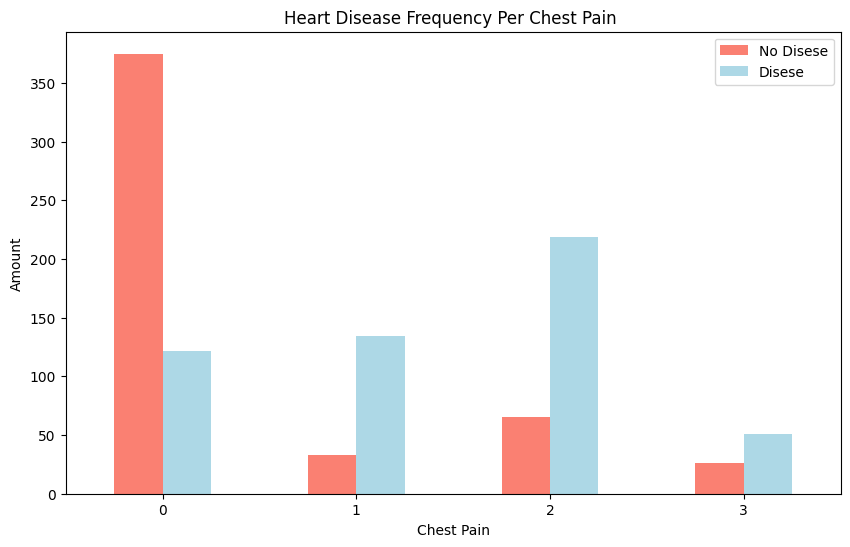

In [19]:
# Heart disease per chest pain
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon", "lightblue"])


plt.title("Heart Disease Frequency Per Chest Pain ")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(["No Disese", "Disese"])
plt.xticks(rotation=0);

In [20]:
# Make a corealation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

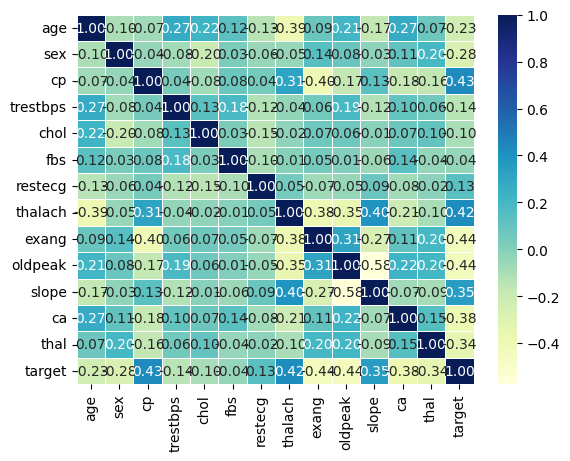

In [21]:
# Calculate correlation between numeric columns
corr_matrix = df.corr()

# Create and display a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")


Modelling

In [22]:
# Create X and y
X = df.drop("target", axis=1)
y= df["target"]


In [23]:
# Split fata into train and ttest
np.random.seed(42)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  # For scaling features
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Load and prepare the data

In [26]:
# Create X (features) and y (target)
X = df.drop("target", axis=1)  # Dropping 'target' column to create the features DataFrame
y = df["target"]  # The target column

# Split data into training and test sets
np.random.seed(42)  # For reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)  # 80% training, 20% test


Scale the features

In [27]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform on the training set
X_test = scaler.transform(X_test)  # Only transform on the test set


Build the Artificial Neural Network model

In [28]:
# Initialize the ANN model
model = Sequential()

# Add an input layer (input_dim is the number of features in X)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Add hidden layer(s)
model.add(Dense(units=32, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))  # Using sigmoid for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train the model

In [29]:
# Train the ANN model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.5815 - loss: 0.6746 - val_accuracy: 0.7707 - val_loss: 0.5027
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8363 - loss: 0.4563 - val_accuracy: 0.7854 - val_loss: 0.4186
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8663 - loss: 0.3378 - val_accuracy: 0.8049 - val_loss: 0.3935
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8657 - loss: 0.3215 - val_accuracy: 0.8098 - val_loss: 0.3816
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8830 - loss: 0.2873 - val_accuracy: 0.7951 - val_loss: 0.3711
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8886 - loss: 0.2777 - val_accuracy: 0.8244 - val_loss: 0.3597
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9026 - loss: 0.2682 - val_accuracy: 0.8146 - val_loss: 0.3530
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8946 - loss: 0.2426 - val_accuracy: 0.8439 - va

Accuracy the model

In [30]:
# Accuracy the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.1665 
Test Accuracy: 98.54%


Make predictions and evaluate performance

In [31]:
# Make predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Accuracy: 98.54%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205


Confusion Matrix:
[[102   0]
 [  3 100]]


Testing OutPut

In [32]:
# Example input data
new_data = np.array([[63, 1, 3, 145, 233, 1, 2, 150, 0, 2, 1, 2, 3]])

# Scale the input data using the same scaler used during training
new_data_scaled = scaler.transform(new_data)

# Predict the output (whether heart disease is present)
prediction = model.predict(new_data_scaled)

# Convert the result to a label (0 = No Disease, 1 = Disease)
predicted_label = (prediction > 0.5).astype(int)

# Print the predicted outcome
print(f"Predicted Output: {'Disease' if predicted_label[0] == 1 else 'No Disease'}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Output: Disease


In [33]:
# Example input data (replace with actual data)
new_data = np.array([[52, 1, 0, 125, 212, 0, 1, 168, 0, 1, 2, 2, 3]])

# Scale the input data using the same scaler used during training
new_data_scaled = scaler.transform(new_data)

# Predict the output (whether heart disease is present)
prediction = model.predict(new_data_scaled)

# Convert the result to a label (0 = No Disease, 1 = Disease)
predicted_label = (prediction > 0.5).astype(int)

# Print the predicted outcome
print(f"Predicted Output: {'Disease' if predicted_label[0] == 1 else 'No Disease'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Output: No Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
